In [70]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [71]:
titanic= sns.load_dataset('titanic')
df = titanic.copy()
print(df.head())

# Degiskenler 2 kategoriye sahip Bay ve bayan
# pcclass stunu siralanabilir
# Age ve Fare gibi stunlarda maximum ve minumum  deger alabilir
# 

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# Sadece sayisal verileri getiriyoruz

In [73]:
num = titanic.select_dtypes(include = ['float64','int64'])
num.sample(100)

,survived,pclass,age,sibsp,parch,fare
208,1,3,16.0,0,0,7.7500
47,1,3,NaN,0,0,7.7500
663,0,3,36.0,0,0,7.4958
738,0,3,NaN,0,0,7.8958
475,0,1,NaN,0,0,52.0000
...,...,...,...,...,...,...
285,0,3,33.0,0,0,8.6625
530,1,2,2.0,1,1,26.0000
609,1,1,40.0,0,0,153.4625
127,1,3,24.0,0,0,7.1417


In [74]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
un_catego = df.select_dtypes(include=["object","bool"])
un_catego

,sex,embarked,who,adult_male,embark_town,alive,alone
0,male,S,man,True,Southampton,no,False
1,female,C,woman,False,Cherbourg,yes,False
2,female,S,woman,False,Southampton,yes,True
3,female,S,woman,False,Southampton,yes,False
4,male,S,man,True,Southampton,no,True
...,...,...,...,...,...,...,...
886,male,S,man,True,Southampton,no,True
887,female,S,woman,False,Southampton,yes,True
888,female,S,woman,False,Southampton,no,False
889,male,C,man,True,Cherbourg,yes,True


In [76]:
df_category = df.select_dtypes(include="category")
df_category

,class,deck
0,Third,NaN
1,First,C
2,Third,NaN
3,First,C
4,Third,NaN
...,...,...
886,Second,NaN
887,First,B
888,Third,NaN
889,First,C


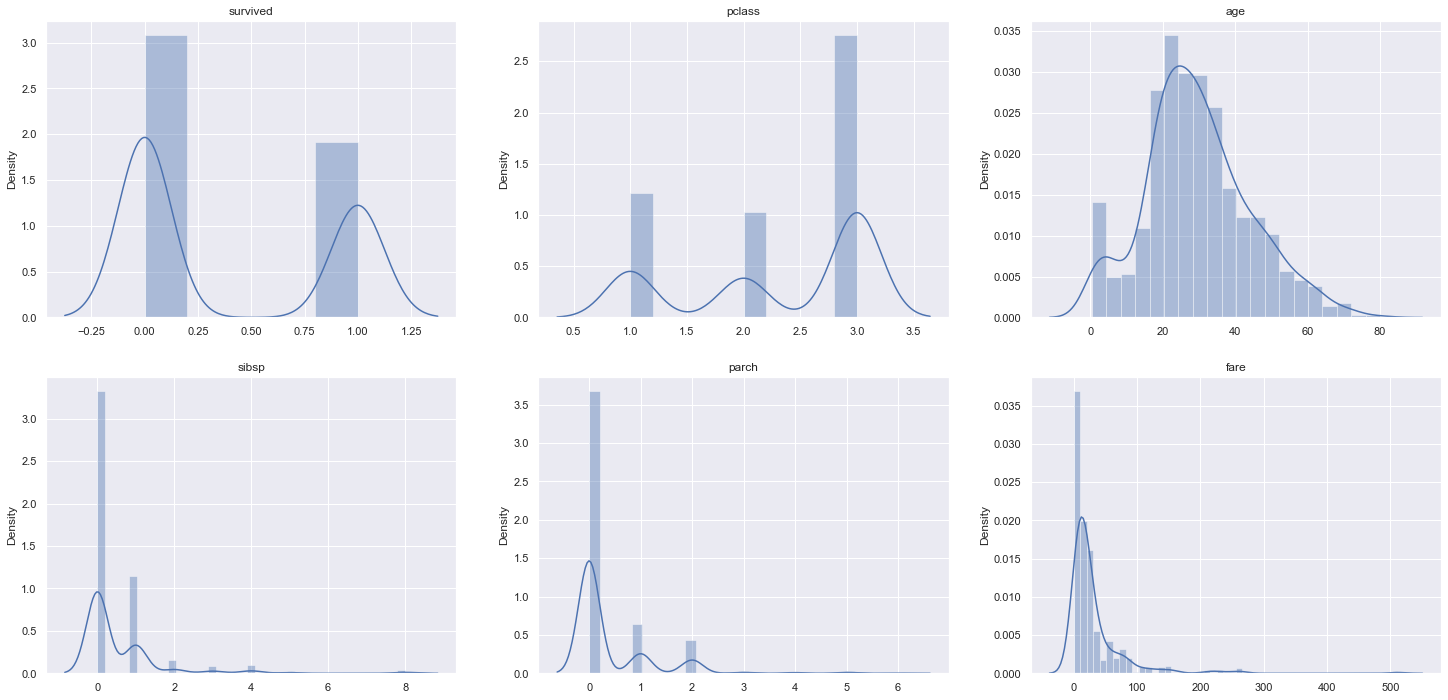

In [77]:
numeric_cols = df.describe().columns
plt.figure(figsize=(25, 12))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,3,i+1)
    sns.distplot(x=df[col])
    plt.title(col)

In [78]:
df.age.value_counts(dropna=False).sort_index()

0.42       1
0.67       1
0.75       2
0.83       2
0.92       1
        ... 
70.50      1
71.00      2
74.00      1
80.00      1
NaN      177
Name: age, Length: 89, dtype: int64

In [79]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [80]:
df['class'].head()

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [81]:
df['pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: int64

In [82]:
df[['sex','class']].head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [83]:
df[['sex_encoded','class_encoded']].head()

KeyError: "None of [Index(['sex_encoded', 'class_encoded'], dtype='object')] are in the [columns]"

In [84]:
pd.get_dummies(df[['sex','class']])

,sex_female,sex_male,class_First,class_Second,class_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,1,0
887,1,0,1,0,0
888,1,0,0,0,1
889,0,1,1,0,0


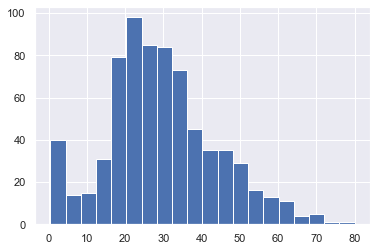

In [85]:
df.age.hist(bins=20);

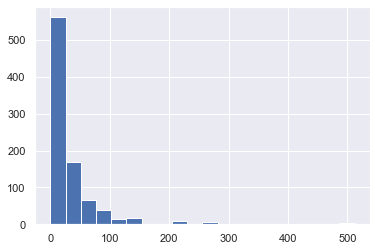

In [86]:
df.fare.hist(bins=20);

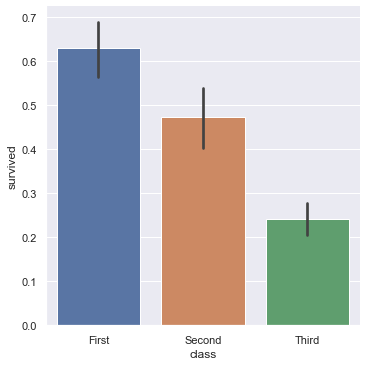

In [87]:
sns.factorplot(x="class", y ="survived", data=df, kind="bar", size=5);

In [ ]:
# Sadece grafiği gözlemleyerek, erkeklerin hayatta kalma oranının% 20 civarında ve kadınların oranının% 75 civarında olduğu yaklaşık olarak görülebilir. Bu nedenle, bir yolcunun erkek mi yoksa kadın mı olduğunu belirlemek, kişinin hayatta kalıp kalmayacağını belirlemede önemli bir rol oynar.
# Daha yüksek sınıf yolcuların alt sınıf yolculardan daha fazla hayatta kalma oranına sahip olup olmadığını belirlemeye yardımcı olur. Sınıf 1 yolcuları, 2 ve 3 sınıflarına kıyasla daha yüksek hayatta kalma şansına sahiptir. Bu, Pclass'ın bir yolcunun hayatta kalma oranına çok katkıda bulunduğunu ima eder.
# Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi vardır.